In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_table = pd.DataFrame({'Peso': np.array([40.0, 93.5, 35.5, 30.0, 52.0, 17.0, 38.5,  8.5, 33.0,  9.5, 21.0, 79.0]) / 2.205,
                            'Altura': np.array([42.8, 63.5, 37.5, 39.5, 45.5, 38.5, 43.0, 22.5, 37.0, 23.5, 33.0, 58.0]) / 39.37,
                            'Cateter': [37, 50, 34, 36, 43, 28, 37, 20, 34, 30, 38, 47]},
                            dtype='float')

In [3]:
def normalization(matrix, vector):
    #Mean calculation
    mVector = np.mean(vector, axis=0)
    mMatrix = np.mean(matrix, axis=0)
    
    #Standard deviation
    stdVector = np.std(vector, axis = 0)
    stdMatrix = np.std(matrix, axis = 0)
     
    #Normalization of data
    vector = (vector - mVector)/stdVector
    matrix = (matrix - mMatrix)/stdMatrix
    
    return matrix, vector

In [4]:
xMatrix = data_table[['Peso', 'Altura']].values
yVector = data_table['Cateter'].values

In [5]:
xMatrix, yVector = normalization(xMatrix, yVector)
xMatrix = np.insert(xMatrix, 0, np.ones(len(xMatrix), dtype=float), axis=1)

In [6]:
def gradientDescent(xMatrix, yVector, nEpochs, alpha):
    initialW = np.ones(len(xMatrix[0]), dtype = float);
    cost = []
    yHat = xMatrix.dot(initialW)    
    for i in range(nEpochs):
        summation = 0;
        for y, y_c, x in zip(yVector, yHat, xMatrix):
            summation += (y - y_c) * x
            
        cost.append(-((1/len(xMatrix)) * summation))
        
        nextW =  initialW + (alpha/len(xMatrix))*summation
        yHat = xMatrix.dot(nextW)
        initialW = nextW
    return nextW, cost

In [7]:
nextW, cost = gradientDescent(xMatrix, yVector, 10000, 0.001)

In [8]:
t = np.arange(0., 10000., 1.)
costColumns = [sub[0] for sub in cost] 

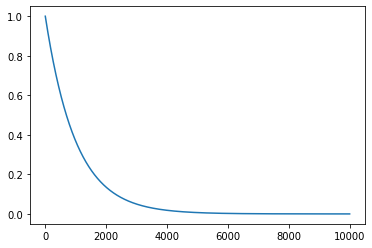

In [9]:
plt.plot(t, costColumns)


In [10]:
nextW

array([4.51733460e-05, 5.06796889e-01, 4.09680295e-01])

In [11]:
def stochasticGradientDescent(xMatrix, yVector, nEpochs, alpha):
    cost = []
    
    data = np.append(xMatrix, np.array([[x] for x in yVector]), axis=1)
    
    initialW = np.ones(len(xMatrix[0]), dtype = float);
    
    yHat = xMatrix.dot(initialW)
    
    for i in range(nEpochs):
        summation = 0;
        for y, yH, x in zip(yVector, yHat, xMatrix):
            aux = (y - yH) * x
            nextW = initialW + alpha * (y - yH) * x
            summation += aux
            
        cost.append(np.linalg.norm((1/len(xMatrix)) * summation, ord=1))
        
            
        data = np.random.permutation(data)

        yVector = data[:, -1]
        xMatrix = data[:, :-1]
        
        yHat = xMatrix.dot(nextW)
        initialW = nextW
        
    return nextW, cost

In [12]:
nextW, cost = stochasticGradientDescent(xMatrix, yVector, 10000, 0.001)

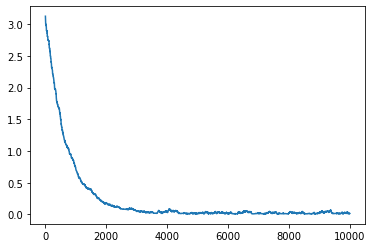

In [13]:
t = np.arange(0., 10000., 1.)
costColumns = cost
plt.plot(t, costColumns)

In [14]:
nextW

array([-0.00094469,  0.5076647 ,  0.40117479])

In [15]:
def analiticRegression(xMatrix, yVector):
    xTranspose = np.transpose(xMatrix)
    return np.linalg.inv(xTranspose.dot(xMatrix)).dot(xTranspose).dot(yVector) 

In [16]:
analiticRegression(xMatrix, yVector)

array([3.74700271e-16, 6.08893878e-01, 3.07583303e-01])